In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
import scipy.stats
import sys
sys.path.append('..')
sys.path.append('../../../code')
from lib import *
plt.style.use('../../../code/peptidome.mplstyle')
from lib.plotting import model_labels as labels

datadir = '../../../code/maxent/data'
figdatadir = './'

In [2]:
proteomes = ['Human', 'Mouse', 'Chicken', 'Zebrafish', 'Humanviruses', 'Tuberculosis', 'Listeria', 'StrepA','Malaria']
model = 'nskewfcov'
k = 9

In [3]:
nattobits = lambda x: x*np.log2(np.exp(1))

In [4]:
Sind = np.log(naminoacids)*k
uniform_matrix = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k))

In [5]:
def get_dkl_uniform_vs_proteome(proteome):
    entropy_reference = pd.read_csv(f'{datadir}/{proteome}_{model}_k{k}_entropy.csv',header=None, index_col=0)
    params_reference = np.load(f'{datadir}/{proteome}_{model}_k{k}_params.npz')
    energy_reference = make_energy(params_reference)

    
    energies_reference = np.array([energy_reference(x) for x in uniform_matrix])
    
    return -Sind+np.mean(energies_reference)-(float(entropy_reference.loc['F']))

In [6]:
N = len(proteomes)
matrix = np.empty((N+1,N+1))
for i in range(N):
    df = pd.read_csv(f'{datadir}/{proteomes[i]}_{model}_k{k}_dkls_all.csv',index_col='reference')
    for j in range(N):
        if i==j:
            dkl = 0
        else:
            dkl = df.loc[proteomes[j]]['DKL']
        matrix[i,j] = nattobits(dkl)
        
# fill in uniform slot
for i in range(N):
    matrix[i,N] = nattobits(Sind - float(pd.read_csv(
        f'{datadir}/{proteomes[i]}_{model}_k{k}_entropy.csv',index_col=0, header=None).loc['S']))
    matrix[N,i] = nattobits(get_dkl_uniform_vs_proteome(proteomes[i]))
    matrix[N,N] = 0
                               

/scratch/lsftmp/12318964.tmpdir/ipykernel_13201/3924576446.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  matrix[i,N] = nattobits(Sind - float(pd.read_csv(
/scratch/lsftmp/12318964.tmpdir/ipykernel_13201/3409858092.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -Sind+np.mean(energies_reference)-(float(entropy_reference.loc['F']))
/scratch/lsftmp/12318964.tmpdir/ipykernel_13201/3924576446.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  matrix[i,N] = nattobits(Sind - float(pd.read_csv(
/scratch/lsftmp/12318964.tmpdir/ipykernel_13201/3409858092.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.

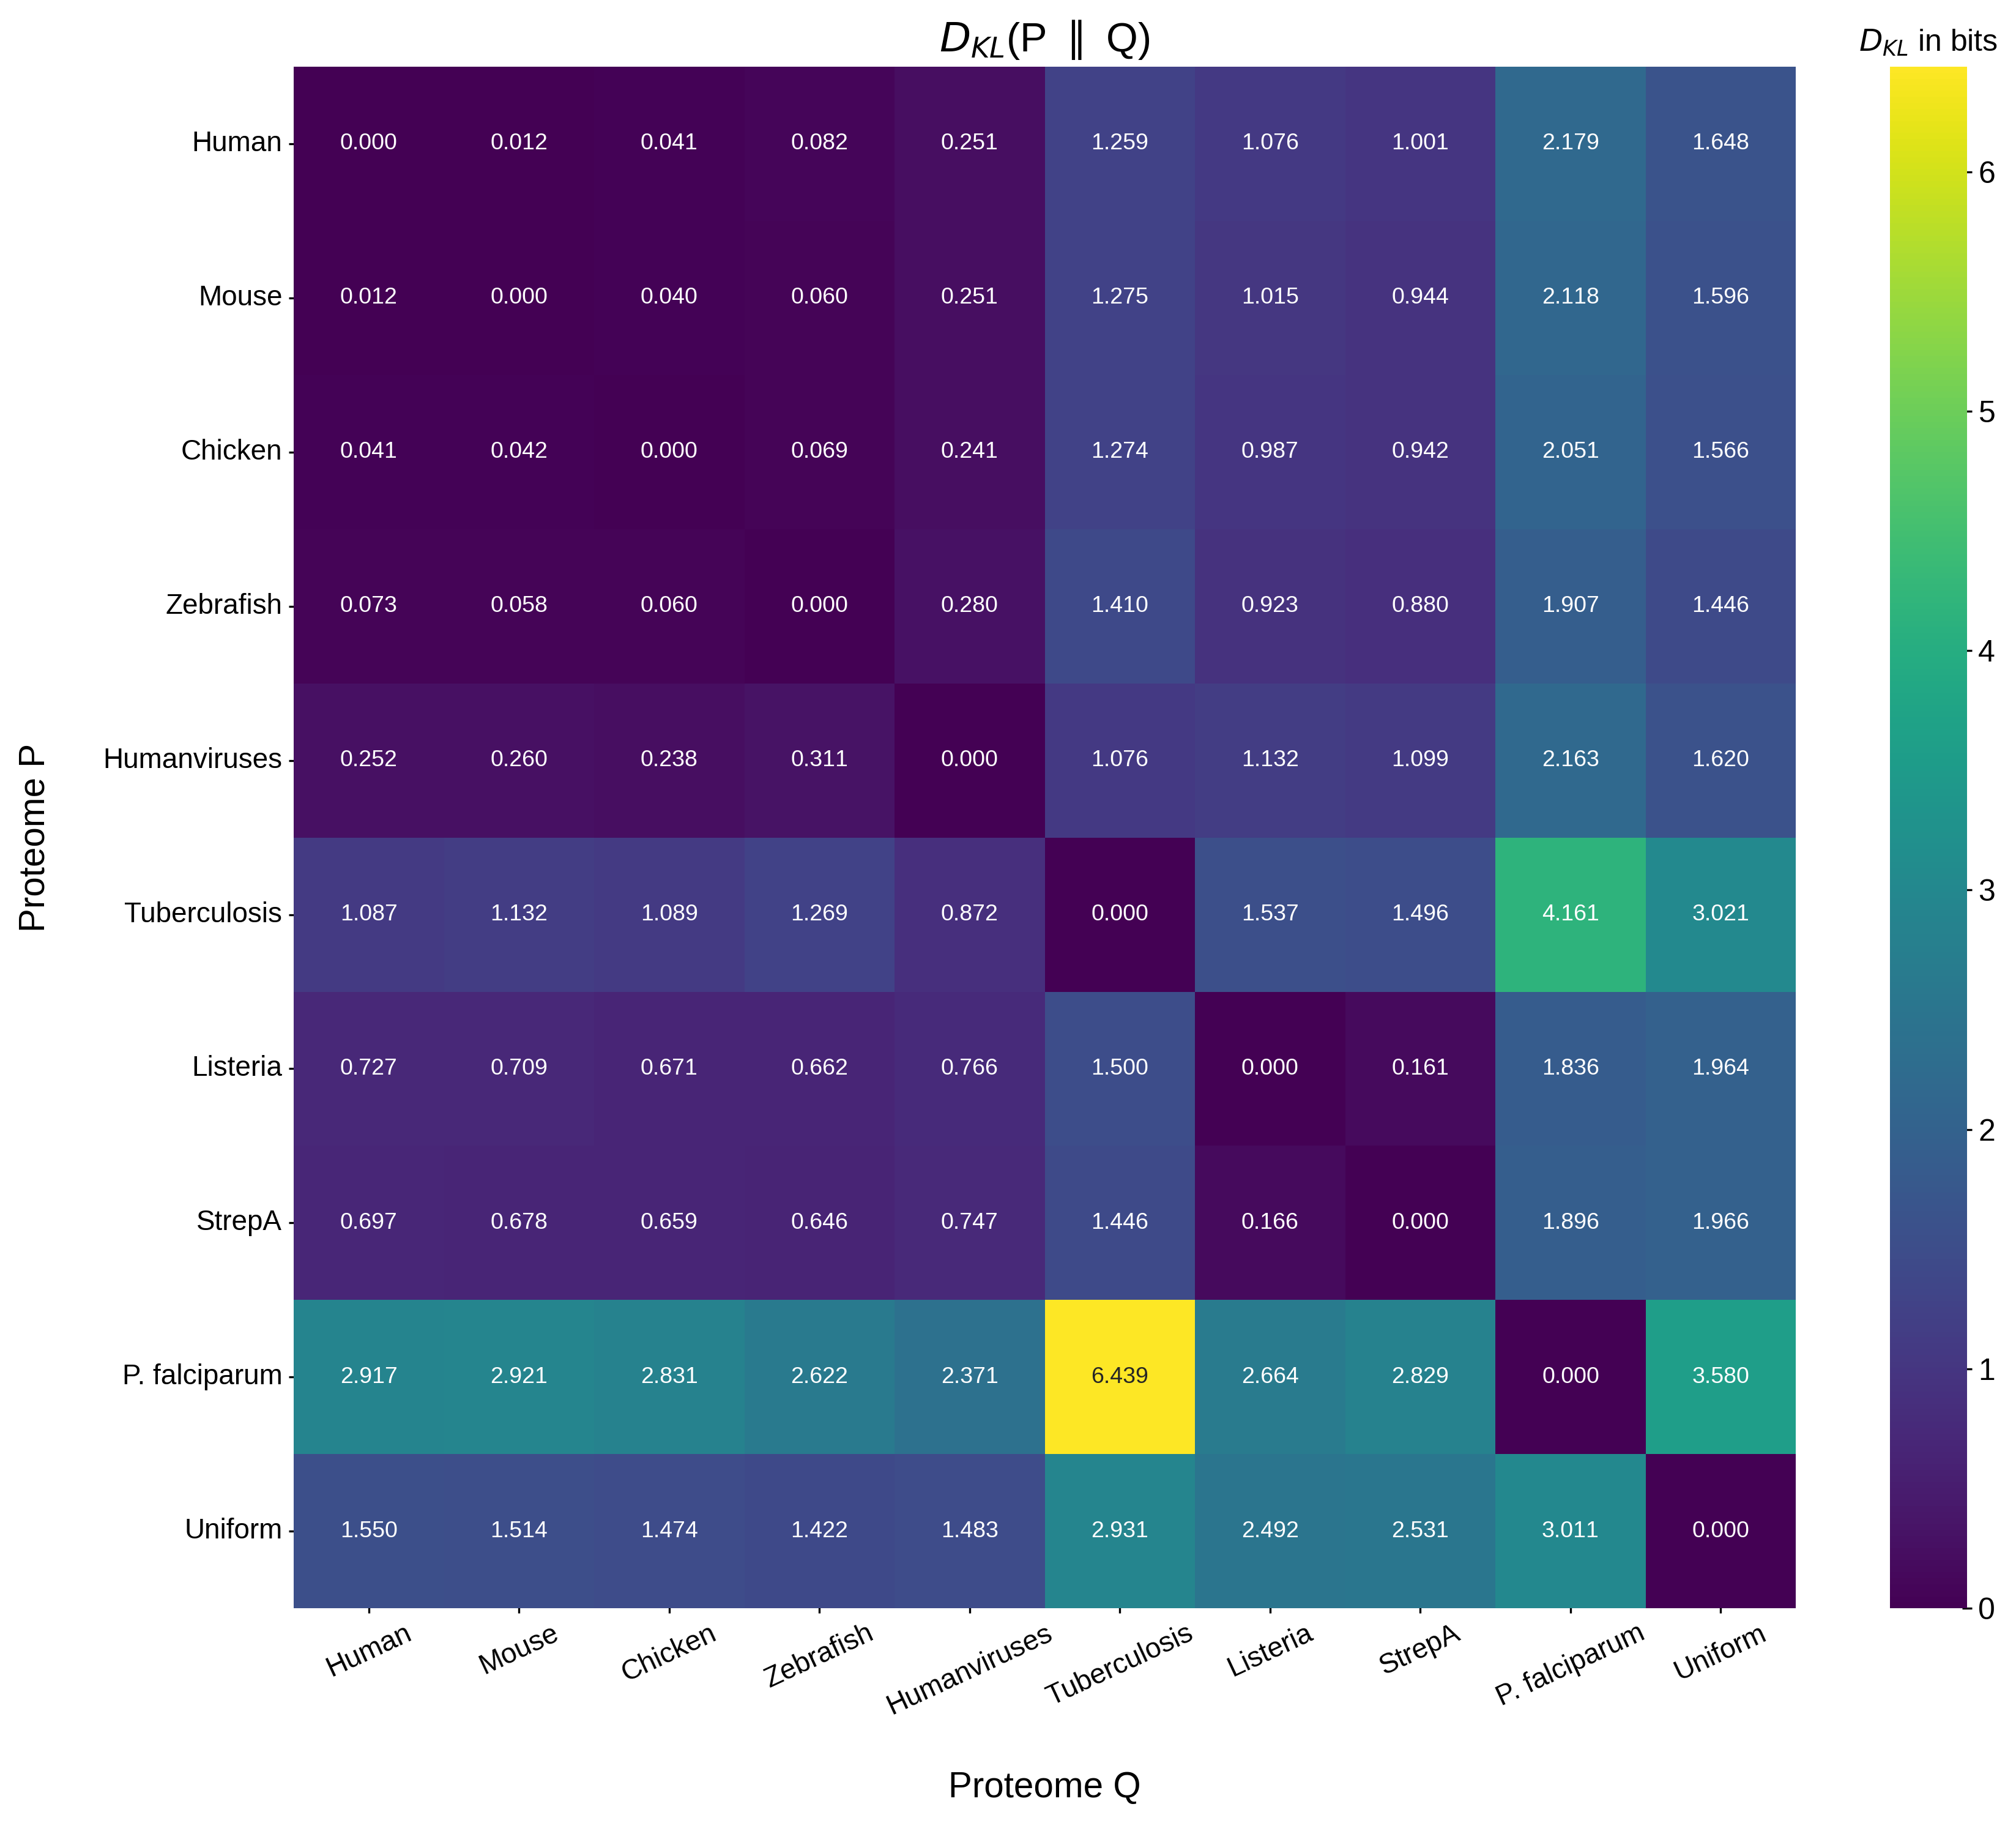

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))

labels = [l if l != 'Malaria' else 'P. falciparum' for l in proteomes ] + ['Uniform']

sns.heatmap(matrix,xticklabels=labels,yticklabels=labels,annot=True,fmt=".3f",ax=ax,cmap="viridis")
ax.tick_params(axis='x', labelsize=11,rotation=25)
ax.tick_params(axis='y', labelsize=11,rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
ax.set_title('$D_{KL}$(P $\\parallel$ Q)',fontsize=16)
cbar.ax.set_title('$D_{KL}$ in bits',fontsize=12)

ax.set_xlabel('Proteome Q',fontsize=14,labelpad=20)
ax.set_ylabel('Proteome P',fontsize=14,labelpad=20)
fig.tight_layout()
plt.savefig('../dkls_all.png')
plt.savefig('../dkls_all.svg')


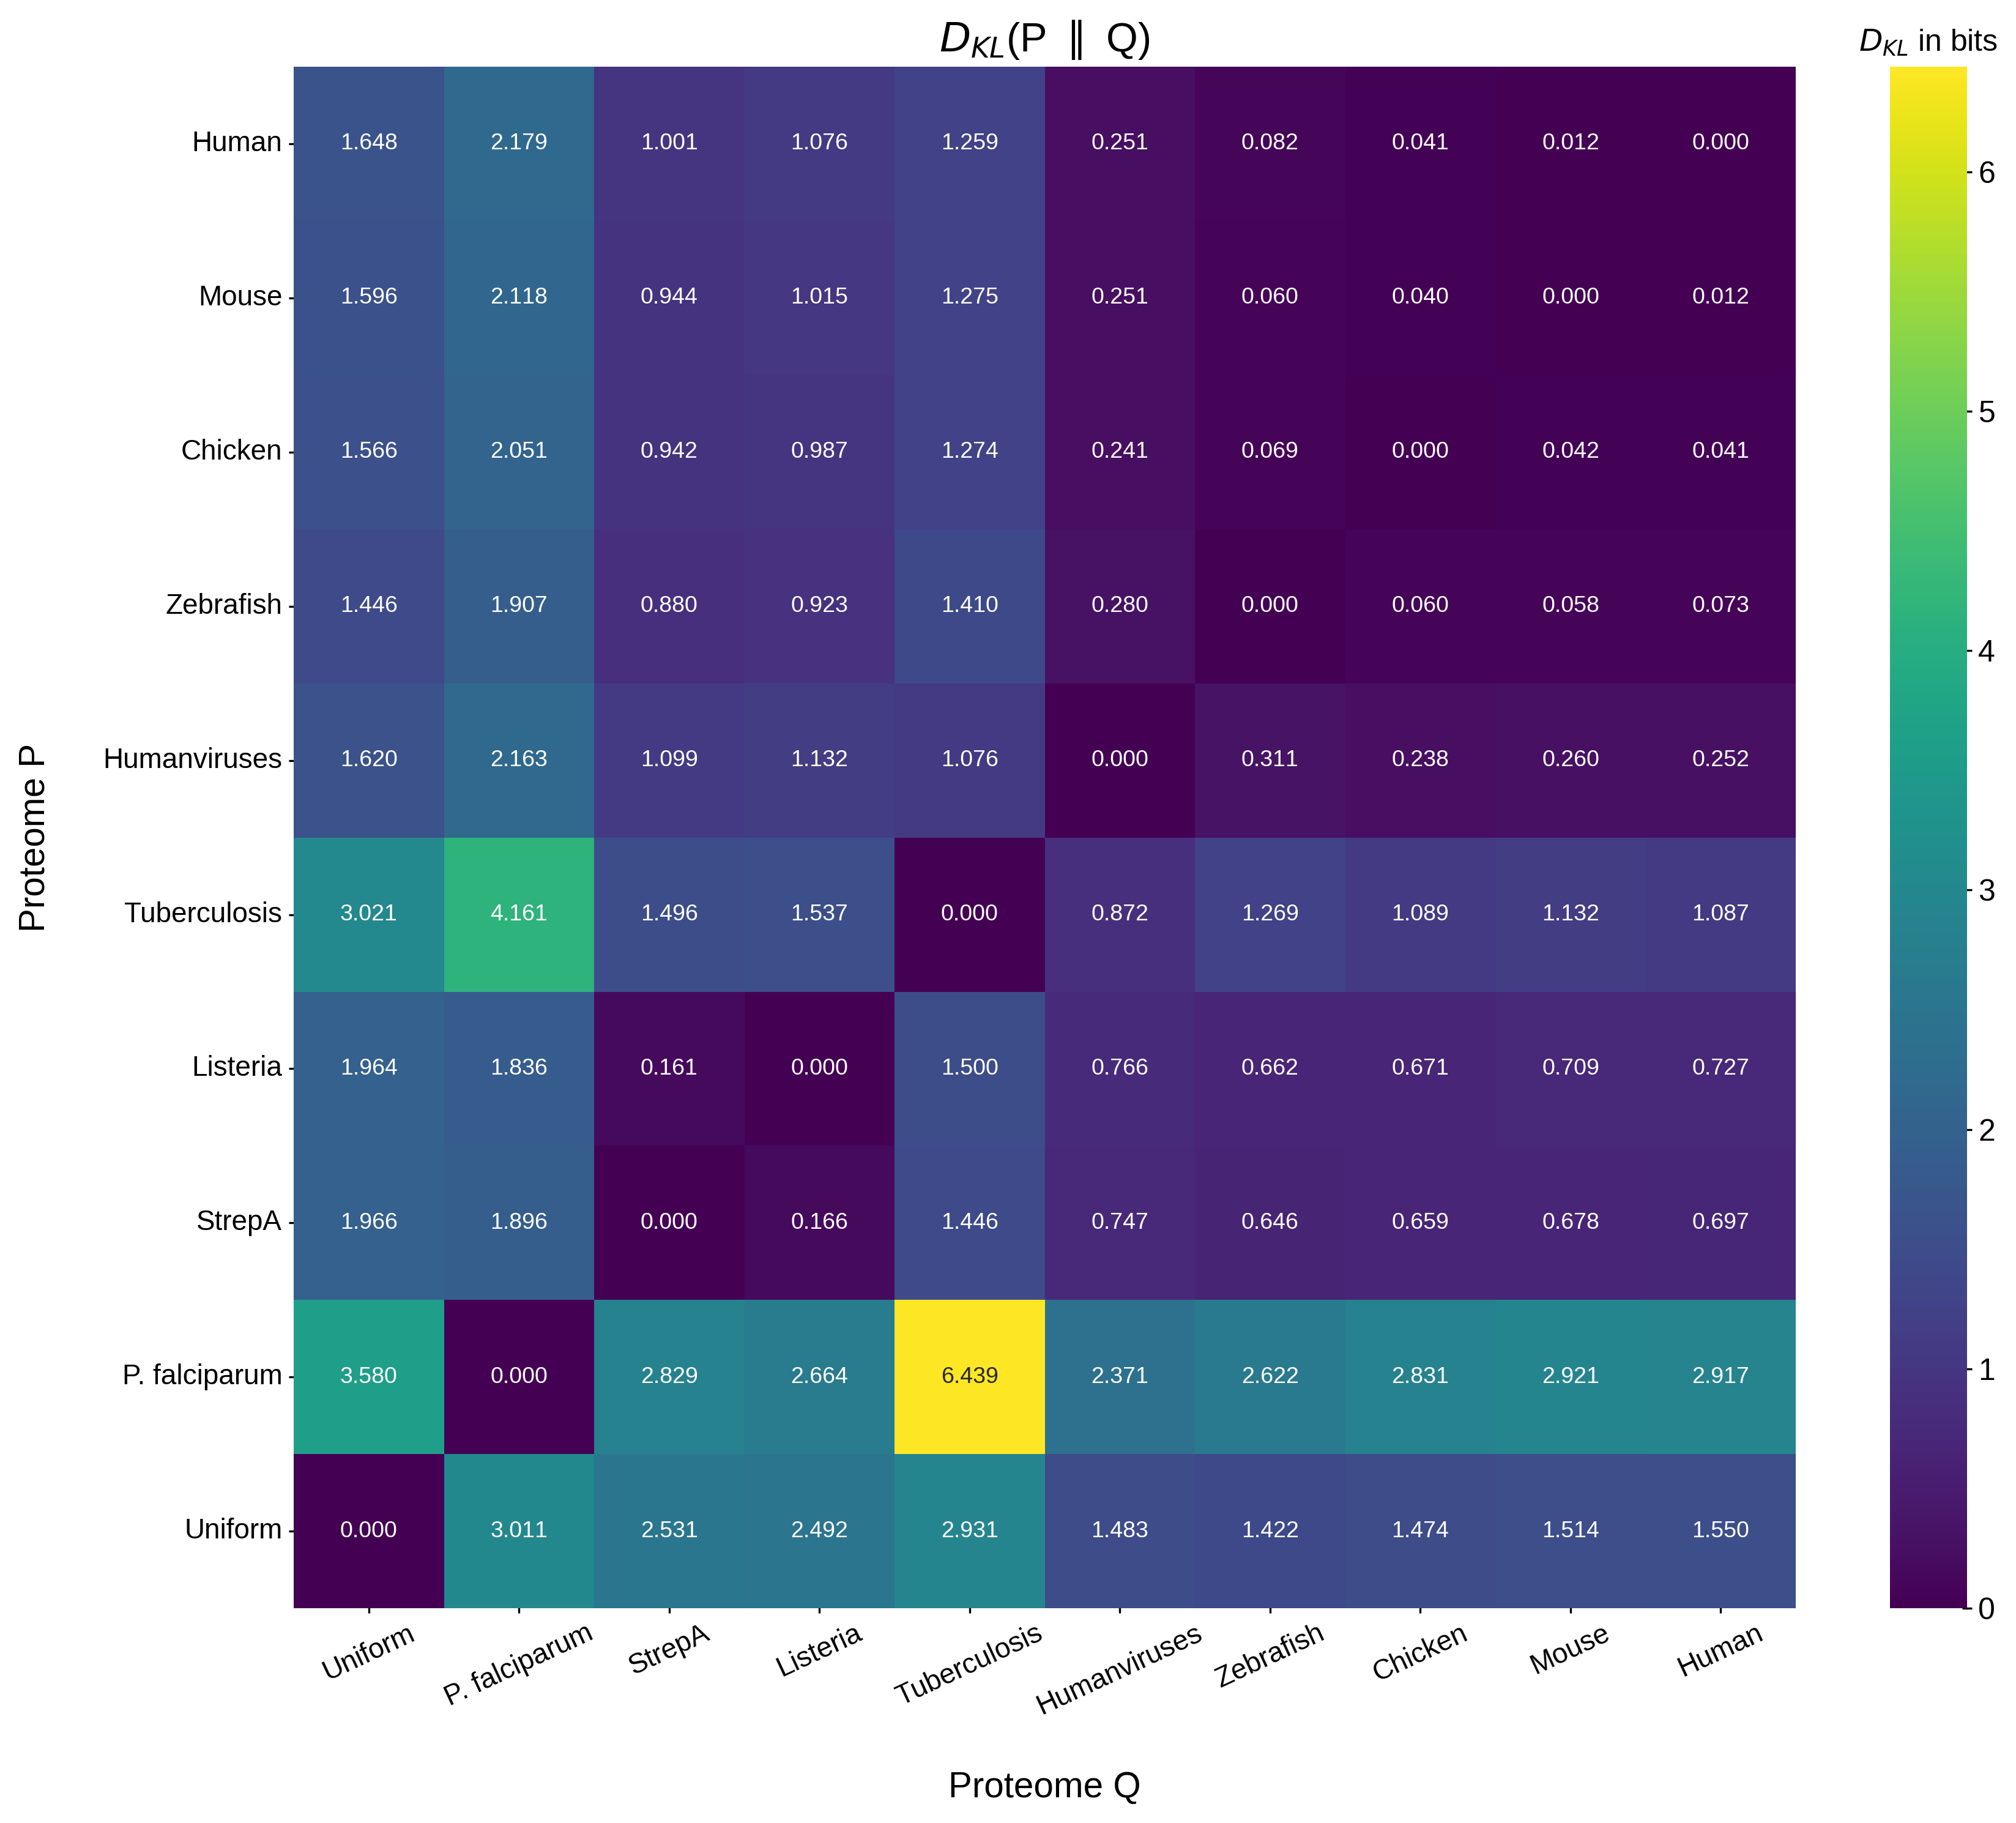

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))

labels = [l if l != 'Malaria' else 'P. falciparum' for l in proteomes ] + ['Uniform']

sns.heatmap(matrix[:, ::-1],xticklabels=labels[::-1],yticklabels=labels,annot=True,fmt=".3f",ax=ax,cmap="viridis")
ax.tick_params(axis='x', labelsize=11,rotation=25)
ax.tick_params(axis='y', labelsize=11,rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
ax.set_title('$D_{KL}$(P $\\parallel$ Q)',fontsize=16)
cbar.ax.set_title('$D_{KL}$ in bits',fontsize=12)

ax.set_xlabel('Proteome Q',fontsize=14,labelpad=20)
ax.set_ylabel('Proteome P',fontsize=14,labelpad=20)
fig.tight_layout()
plt.savefig('../dkls_reversed_all.png')
plt.savefig('../dkls_reversed_all.svg')
